In [ ]:
"""
Liviginston
-Linear Regression
-Polymonial Regression
-Multiple Regression
Scale

Jeff
-train and test
logistic regression
Descision trees
confusion matrix
categorical data
k-means
cross-validation
AUC ROC curve
KNN
"""


#Intoduction to Machine Leraning
#Algorithms, Models hat help computer to learn and predict
"""
1. Image processing
2. Speech recognition
3.Fraud detection

Approaches to machine learning(types)
1. Supervised learning: dataset is labelled, you can make predictions using the data in columns,
 decision trees, LinearRegression, support vector,neural network
2. Unsupervised learning: dataset is unlabelled, use cluusttering algorithms to group data together
k-means clustering, hierarchical clustering, PCA(principal component analysis)
3.Reinforcement Learning: 

1.Problem Formulation:
*Define the problem! -> Classification Task, Regression Analysis, Clustering, Anomaly detection, recommendation
2. Gather the data
3. slpit the data

Data types
Thre categories of data
1. Numerical data -> can be discrete(integers) or continuous(infinite values)
2. Categorical data -> can be measured against each other
3. Ordinal -> measured against each other
"""

In [5]:
import numpy as np # for linear algebra
import pandas as pd # fordata processing, csv files
import matplotlib.pyplot as plt # for plotting / data visualization
import seaborn as sns # for statistical visualization
%matplotlib inline

#ML for regressions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#control diplay (this is optional)
pd.options.display.max_columns = 50
sns.set(style = "darkgrid", rc ={'axes.facecolor':'#CAF1DE'})

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Load the datset
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
"""
cp= chest pain
restbps -> resting blood pressure
chol -> cholestoral
fbs -> fastig blood sugar
restcg -> resting electrocardipography
exang -> exercise induced agina
oldpeak -> ST depression induced
slope -> the slope of the peak exercise
ca -> nuber of the major vessel
thal -> normal, fexied defect, reversible defect
target -> 1= yes, 0= no
"""

In [8]:
#show people with heart diseases
#column target

df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [10]:
#show percentage of male and female
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])

#show output
print('Percentage of female patients: {:.2f}%'.format(count_female/(len(df.sex))*100))
print('Percentage of female patients: {:.2f}%'.format(count_male/(len(df.sex))*100))

Percentage of female patients: 30.44%
Percentage of female patients: 69.56%


In [11]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


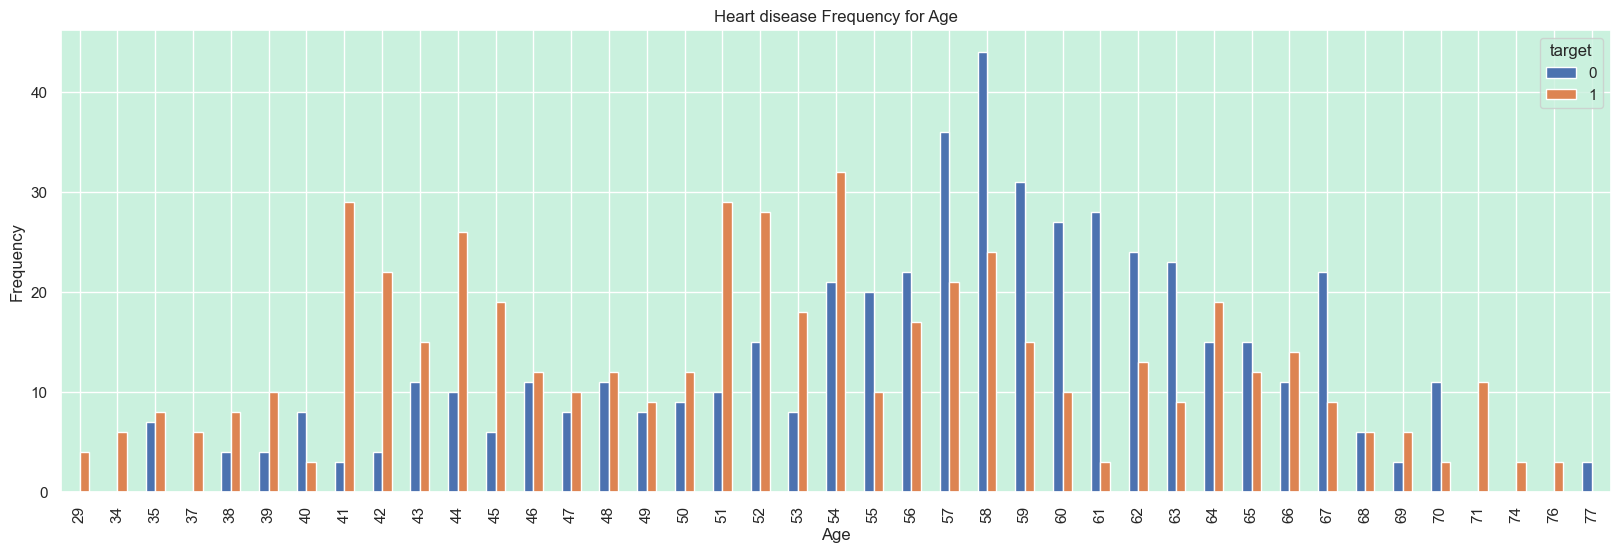

In [12]:
#Barplot showing heart diseases frequency of age

pd.crosstab(df.age, df.target).plot(kind= 'bar',figsize= (20,6))
plt.title('Heart disease Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

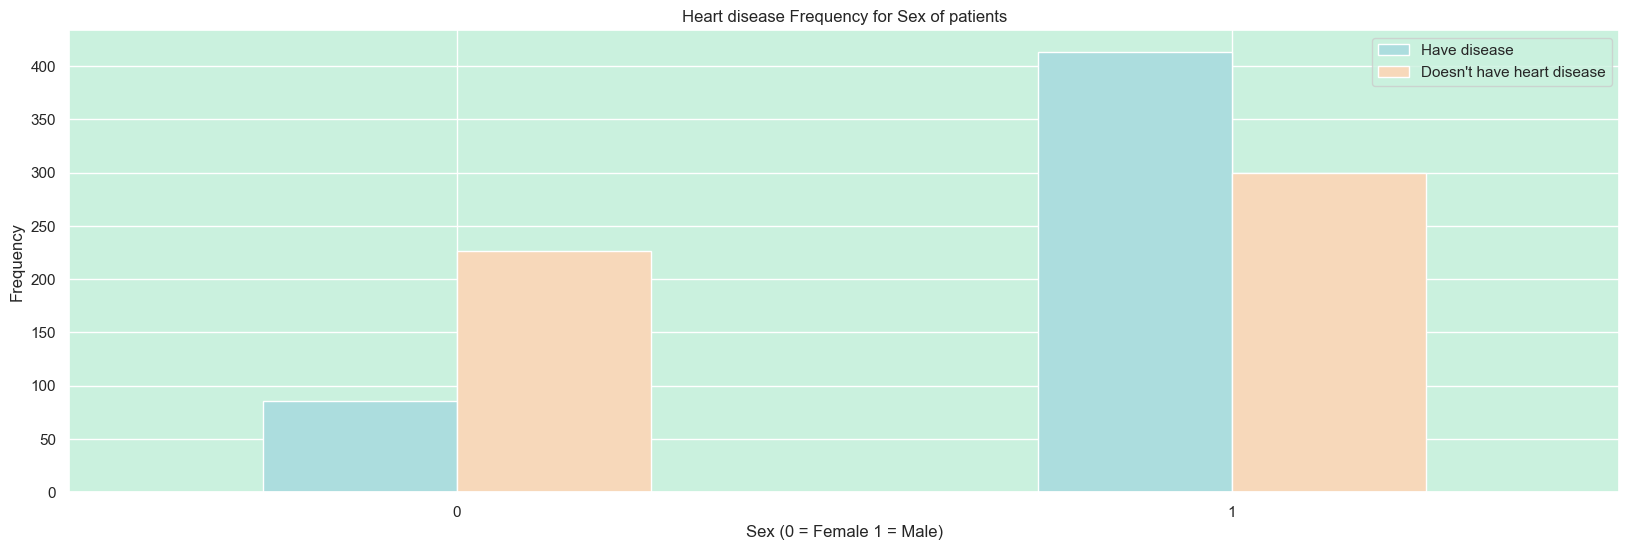

In [20]:
#Data visualzationof heart Disease for sex
pd.crosstab(df.sex, df.target).plot(kind= 'bar',figsize= (20,6), color = ['#ACDDDE','#F7D8BA'])
plt.title('Heart disease Frequency for Sex of patients')
plt.legend(['Have disease','Doesn\'t have heart disease'])
plt.xticks(rotation =0)
plt.xlabel('Sex (0 = Female 1 = Male)')
plt.ylabel('Frequency')
plt.show()


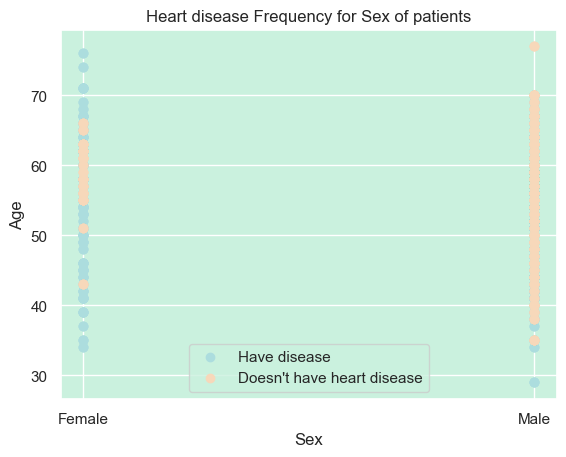

In [21]:
plt.scatter(df[df['target'] == 1]['sex'], df[df['target'] == 1]['age'], color='#ACDDDE', label='Have disease')
plt.scatter(df[df['target'] == 0]['sex'], df[df['target'] == 0]['age'], color='#F7D8BA', label='Doesn\'t have heart disease')

plt.title('Heart disease Frequency for Sex of patients')
plt.legend()
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

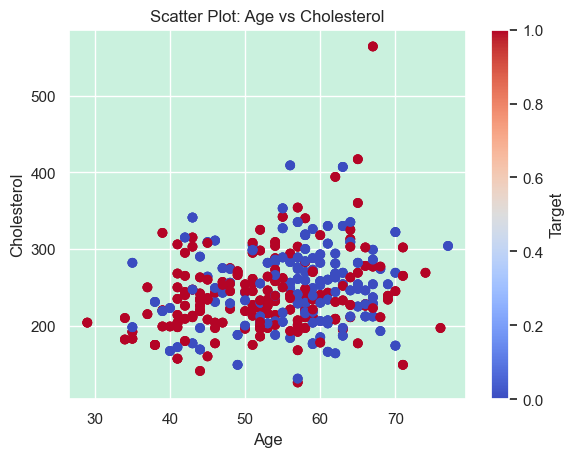

In [22]:
age = df['age']
chol = df['chol']

# Create scatter plot
plt.scatter(age, chol, c=df['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: Age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()

In [ ]:
"""
#Working with ML model
#looking at accuracy of different ML 

#Create Model for logistic regression

Solve problems based on classification
- Create independent variables and dependent variables (helps us with categorical pridiction ) 
"""

In [23]:
#Creating a model for LogisticRegression

y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [24]:
#Normalize the data
#split data for training and testing
#80% for training amd 20% for testing
#Normalize the data x = (x -xmin)/(xmax -xmin) 
x = (x_data - np.min(x_data))/ (np.max(x_data) - np.min(x_data))

In [ ]:
#Split the data 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state=0)

#logistic regression, testing and training, descion tress

In [ ]:
#Transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [ ]:
#Machine Learning
#Train and test
"""
Training data
Important to have the independent variables and dependent variables
Divide the data, x,y
train _x, test_x, train_y, test_y

splitting data
Divide data into two subsets
larger propotion of the data for training and the smaller one for testing
(8:2) or (7:3)
Evaluate performance of accuracy -> 100% or like 99.87% Accuracy

Model Testing
Be specific with the trianing algorithm(linear regression, decision trees,svm, knn, etc)

Model Evaluation
Evaluation Matrics -> F1 score, accuracy, recall, precision, mean squared errors


"""

In [ ]:
#import ML libraries
from sklearn.model_selection import train_test_split #split the data set
from sklearn.linear_model import LogisticRegression # dealing with categporical outcome
from sklearn.metrics import accuracy_score #get accuracy

#Dataset let x be the independent variable and y be the dependent variable(target variable)
# it is important to store the independent vaiable as x and store the dependent(target variable) as y

#Split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.3, random_state= 40)
#X_train are the input and the Y_train are the output

#Model training 
model = LogisticRegression() #helps us get a relationship between the features
model.fit(X_train, Y_train) 

#Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)

#display accuracy
print(accuracy)


In [4]:
#Cretae data using an array
import numpy
from sklearn import linear_model

X = numpy.array([1,2,3,4]).reshape(-1,1)
y = numpy.array([0,0,1,1])  #0 is No and 1 is yes

#Model Training
logr = linear_model.LogisticRegression()
logr.fit(X, y)

#model Evaluation
y_pred = logr.predict(numpy.array([1]).reshape(-1,1))
#accuracy = accuracy_score(numpy.array(y_pred))

print(y_pred)

[0]


In [ ]:
#Decision trees
"""
Uses classification and Regression
Pros
- Easy to uderstand
- Can handle both classification and Regression
- Captures non linear relationships
- Can handle missing values or outliers

cons
-Prone to over fitting
-Sensitivity to small changes
-May not perform well with features or noise data
"""

In [ ]:
#decision Tree demonstration
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.3, random_state= 40)
#X_train are the input and the Y_train are the output

#Model training 
model = DecisionTreeClassifier() #helps us get a relationship between the features
model.fit(X_train, Y_train) 

#Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)

#display accuracy
print(accuracy)

#worked example! 1.
#learn to set up the django and flask environment
